# Chronic Kidney Disease

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Data Set Information:
1.  Age (numerical): age in years
2.  Blood Pressure (numerical): bp in mm/Hg
3.  Specific Gravity (nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.  Albumin (nominal): al - (0,1,2,3,4,5)
5.  Sugar (nominal): su - (0,1,2,3,4,5)
6.  Red Blood Cells (nominal): rbc - (normal, abnormal)
7.  Pus Cell (nominal): pc - (normal,abnormal)
8.  Pus Cell Clumps (nominal): pcc - (present, notpresent)
9.  Bacteria (nominal): ba - (present, notpresent)
10. Blood Glucose Random (numerical): bgr in mgs/dl
11. Blood Urea (numerical): bu in mgs/dl
12. Serum Creatinine (numerical): sc in mgs/dl
13. Sodium (numerical): sod in mEq/L
14. Potassium (numerical): pot in mEq/L
15. Hemoglobin (numerical): hemo in gms
16. Packed Cell Volume (numerical): pcv
17. White Blood Cell Count (numerical): wc in cells/cumm
18. Red Blood Cell Count (numerical): rc in millions/cmm
19. Hypertension (nominal): htn - (yes, no)
20. Diabetes Mellitus (nominal): dm - (yes, no)
21. Coronary Artery Disease (nominal): cad - (yes, no)
22. Appetite (nominal): appet - (good, poor)
23. Pedal Edema (nominal): pe - (yes, no)
24. Anemia (nominal): ane - (yes, no)
25. Class (nominal) classification - (ckd, notckd)

**The goal is to classify whether a given patient has a Chronic Kidney Disease ('ckd') or not ('notckd').
The database has 400 rows.**

# Section 1: Exploratory Data Analysis (EDA)

# 1.1: Main libraries, data loading and formatting

In this section I load the most common libraries for exploratory analysis, data visualization and manipulation. Then I will load the dataset and format the names of the columns for a better aesthetics, as well as binarize the target variable.

In [99]:
import numpy as np    # For numerical operation
import pandas as pd   # For database manipulations
pd.options.mode.chained_assignment = None
import seaborn as sns # For data visualization
import matplotlib     # For data visualization
import matplotlib.pyplot as plt # For data visualization
%matplotlib inline    

matplotlib.rc('font', size=16)                   # To use big fonts...
plt.rcParams['figure.figsize'] = (50.0, 8.0)     # To set figure sizes for big plots
matplotlib.rc('figure', facecolor='white')       # To set white as the background color for plots

# Loading the dataset and making some initial arrangements
dataframe = pd.read_csv("2005_kidney_disease.csv")


dataframe = dataframe.rename(columns={"id": "Patient",
                                      "age": "Age",
                                      'bp': "Blood Pressure",
                                      'sg': 'Specific Gravity',
                                      'al': 'Albumina',
                                      'su': 'Sugar',
                                      'rbc': 'Red Blood Cells',
                                      'pc': 'Pus Cell',
                                      'pcc': 'Pus Cell Clumps',
                                      'ba': 'Bacteria',
                                      'bgr': 'Blood Glucose Random',
                                      'bu': 'Blood Urea',
                                      'sc': 'Serum Creatinine',
                                      'sod': 'Sodium',
                                      'pot': 'Potasium',
                                      'hemo': 'Hemoglobin',
                                      'pvc': 'Packed Cell Volume',
                                      'wc': 'White Blood Cell Count',
                                      'rc': 'Red Blood Cell Count',
                                      'htn': 'Hypertension',
                                      'dm': 'Diabetes Mellitus',
                                      'cad': 'Coronary Artery Disease',
                                      'appet': 'Appetite',
                                      'pe': 'Pedal Edema',
                                      'ane': 'Anemia',
                                      'classification': 'Label'})


dataframe['Label'] = dataframe['Label'].replace('ckd\t', "ckd")
dataframe['Label'] = np.where(dataframe['Label']=='ckd',1,0)
dataframe.set_index('Patient',inplace=True)
dataframe.columns = [el.upper() for el in dataframe.columns]


dataframe

AGE  BLOOD PRESSURE  SPECIFIC GRAVITY  ALBUMINA  SUGAR  \
Patient                                                            
0        48.0            80.0             1.020       1.0    0.0   
1         7.0            50.0             1.020       4.0    0.0   
2        62.0            80.0             1.010       2.0    3.0   
3        48.0            70.0             1.005       4.0    0.0   
4        51.0            80.0             1.010       2.0    0.0   
...       ...             ...               ...       ...    ...   
395      55.0            80.0             1.020       0.0    0.0   
396      42.0            70.0             1.025       0.0    0.0   
397      12.0            80.0             1.020       0.0    0.0   
398      17.0            60.0             1.025       0.0    0.0   
399      58.0            80.0             1.025       0.0    0.0   

        RED BLOOD CELLS  PUS CELL PUS CELL CLUMPS    BACTERIA  \
Patient                                                         
0                   NaN    normal      notpresent  notpresent   
1                   NaN    normal      notpresent  notpresent   
2                normal    normal      notpresent  notpresent   
3                normal  abnormal         present  notpresent   
4                normal    normal      notpresent  notpresent   
...                 ...       ...             ...         ...   
395              normal    normal      notpresent  notpresent   
396              normal    normal      notpresent  notpresent   
397              normal    normal      notpresent  notpresent   
398              normal    normal      notpresent  notpresent   
399              normal    normal      notpresent  notpresent   

         BLOOD GLUCOSE RANDOM  ...  PCV  WHITE BLOOD CELL COUNT  \
Patient                        ...                                
0                       121.0  ...   44                    7800   
1                         NaN  ...   38                    6000   
2                       423.0  ...   31                    7500   
3                       117.0  ...   32                    6700   
4                       106.0  ...   35                    7300   
...                       ...  ...  ...                     ...   
395                     140.0  ...   47                    6700   
396                      75.0  ...   54                    7800   
397                     100.0  ...   49                    6600   
398                     114.0  ...   51                    7200   
399                     131.0  ...   53                    6800   

         RED BLOOD CELL COUNT  HYPERTENSION  DIABETES MELLITUS  \
Patient                                                          
0                         5.2           yes                yes   
1                         NaN            no                 no   
2                         NaN            no                yes   
3                         3.9           yes                 no   
4                         4.6            no                 no   
...                       ...           ...                ...   
395                       4.9            no                 no   
396                       6.2            no                 no   
397                       5.4            no                 no   
398                       5.9            no                 no   
399                       6.1            no                 no   

        CORONARY ARTERY DISEASE APPETITE PEDAL EDEMA ANEMIA LABEL  
Patient                                                            
0                            no     good          no     no     1  
1                            no     good          no     no     1  
2                            no     poor          no    yes     1  
3                            no     poor         yes    yes     1  
4                            no     good          no     no     1  
...                         ...      ...         ...    ...   ...  
395 

I see that the database consists of 400 rows and 26 columns (not counting the Patient one which was set to index the dataframe). 

## 1.2: Quick Statistical Review

In the next cell I will run a quick report to have a global statistical view of the data and look for existing caveats. I will run this quick report with the library Pandas-Profiling which can be installed following the steps in https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html.

In [100]:
from pandas_profiling import ProfileReport
ProfileReport(dataframe, title='Pandas Profiling Report')

General description:
1. There are 1009 missing values, which I will impute later
2. There are no duplicated rows
3. There are 11 numerical variables, 10 categorical and 4 boolean
4. Some of the numerical variables show high skewness and kurtosis, which I will fix later
5. Some of the categorical variables show some weird labels and high cardinality

## 1.3 Data Types and Formats

In section 1.2, I saw some strange labels, unformatted, appearing on some of the variables. I will check their unique values and give them a good format.

#### RED BLOOD CELL COUNT

I see this variable has float numbers as strings, large cardinality and there are some values which are not numeric, such as '\t?'. I will trandform this symbol to NaN and then to convert the whole variable to float type.

In [101]:
dataframe['RED BLOOD CELL COUNT'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [102]:
dataframe['RED BLOOD CELL COUNT'] = dataframe['RED BLOOD CELL COUNT'].replace('\t?',np.NaN)
dataframe['RED BLOOD CELL COUNT'] = dataframe['RED BLOOD CELL COUNT'].apply(lambda x: float(x))

#### WHITE BLOOD CELL COUNT

This variable presents similar problems as the one before, I will apply the same methodology.

In [103]:
dataframe['WHITE BLOOD CELL COUNT'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [104]:
dataframe['WHITE BLOOD CELL COUNT'] = dataframe['WHITE BLOOD CELL COUNT'].replace(['\t6200','\t8400','\t?'],
                                                                                  [6200,8400,np.NaN])
dataframe['WHITE BLOOD CELL COUNT'] = dataframe['WHITE BLOOD CELL COUNT'].apply(lambda x: float(x))

#### DIABETES MELLITUS

This variable has some unformatted text entries such as '\tno', '\tyes' and ' yes'; I will replace them by no and yes respectively.

In [105]:
dataframe['DIABETES MELLITUS'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [106]:
dataframe['DIABETES MELLITUS'] = dataframe['DIABETES MELLITUS'].replace(['\tno', '\tyes', ' yes'],
                                                                        ['no', 'yes', 'yes'])

#### CORONARY ARTERY DISEASE

This variable presents the same problem as DIABETES MELLITUS, therefore, I will apply the same methodology.

In [107]:
dataframe['CORONARY ARTERY DISEASE'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [108]:
dataframe['CORONARY ARTERY DISEASE'] = dataframe['CORONARY ARTERY DISEASE'].replace('\tno','no')

#### PCV
This variable at first sight looks like int type, however, it represents a volumen, therefore, a float type is more suitable.
There are also unformatted symbols such as '\t' and '\t43', which I will replace by NaN and 43 respectively. 

In [109]:
dataframe['PCV'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [110]:
dataframe['PCV'] = dataframe['PCV'].replace(['\t?', '\t43'],
                                            [np.NaN, 43])
dataframe['PCV'] = dataframe['PCV'].apply(lambda x: float(x))

#### Now the data types!
I will check the data types and formats of each column of the dataframe.

In [112]:
types = dataframe.dtypes.to_frame()
types = types.rename(columns={0: "Type"})
types

Type
AGE                      float64
BLOOD PRESSURE           float64
SPECIFIC GRAVITY         float64
ALBUMINA                 float64
SUGAR                    float64
RED BLOOD CELLS           object
PUS CELL                  object
PUS CELL CLUMPS           object
BACTERIA                  object
BLOOD GLUCOSE RANDOM     float64
BLOOD UREA               float64
SERUM CREATININE         float64
SODIUM                   float64
POTASIUM                 float64
HEMOGLOBIN               float64
PCV                      float64
WHITE BLOOD CELL COUNT   float64
RED BLOOD CELL COUNT     float64
HYPERTENSION              object
DIABETES MELLITUS         object
CORONARY ARTERY DISEASE   object
APPETITE                  object
PEDAL EDEMA               object
ANEMIA                    object
LABEL                      int64

In [113]:
NUM_VARS = types[types['Type']=='float64'].index.values
CAT_VARS = types[types['Type']=='object'].index.values
TARGET = 'LABEL'

print(NUM_VARS)
print(CAT_VARS)

['AGE' 'BLOOD PRESSURE' 'SPECIFIC GRAVITY' 'ALBUMINA' 'SUGAR'
 'BLOOD GLUCOSE RANDOM' 'BLOOD UREA' 'SERUM CREATININE' 'SODIUM'
 'POTASIUM' 'HEMOGLOBIN' 'PCV' 'WHITE BLOOD CELL COUNT'
 'RED BLOOD CELL COUNT']
['RED BLOOD CELLS' 'PUS CELL' 'PUS CELL CLUMPS' 'BACTERIA' 'HYPERTENSION'
 'DIABETES MELLITUS' 'CORONARY ARTERY DISEASE' 'APPETITE' 'PEDAL EDEMA'
 'ANEMIA']


In the last line I separated the numerical variables from the categorical ones and the target, in order to make the data transformations easier.

## 1.4: Frequency histograms

I will plot the histograms of the numerical and categorical variables to extract some preliminary information out of them. I will start by the numerical ones.

### Numerical Variables

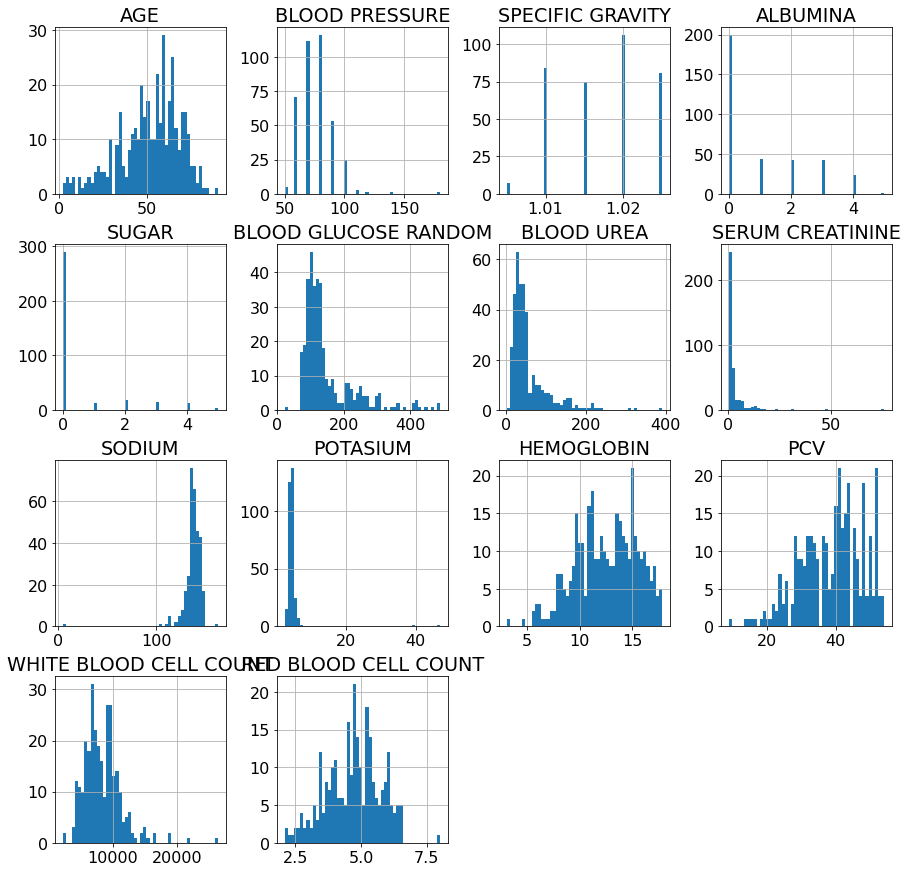

In [114]:
plt.rcParams['figure.figsize'] = (15.0,15.0)  
dataframe[NUM_VARS].hist(bins=50)
plt.show()

I see some of the numerical variables such as Blood Pressure, Specific Gravity, Albumina and Sugar, with discrete distributions, however, they should be continuous because of their physical meaning.

#### BLOOD PRESSURE

I see, for example, within this variable, high cardinality, however, this type of variable should be continuous as it represents a measurable quantity; therefore, I will leave it the way it is.

In [115]:
dataframe['BLOOD PRESSURE'].unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

#### SPECIFIC GRAVITY

I see only five unique values with steps of 0.005. Looking to the link below
https://en.wikipedia.org/wiki/Urine_specific_gravity

I learnt that the concentration of the excreted molecules determines the urine's specific gravity. In adult humans, normal specific gravity values range from 1.010 to 1.030.

In [116]:
dataframe['SPECIFIC GRAVITY'].unique()

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

I will categorize this variable.

In [117]:
dataframe['SPECIFIC GRAVITY'] = dataframe['SPECIFIC GRAVITY'].replace([1.02,1.01,1.005,1.015,1.025],
                                                                      ['1.02','1.01','1.005','1.015','1.025'])

#### ALBUMNA

Regarding this variable , I will categorize it as well according to the following scheme:

In [118]:
dataframe['ALBUMINA'].unique() 

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [119]:
dataframe['ALBUMINA'] = dataframe['ALBUMINA'].replace([0,1,2,3,4,5],
                                                      ['low','medium','medium','medium','high','high'])

#### SUGAR

I will categorize this variable similar to the ALBUMINA.

In [120]:
dataframe['SUGAR'].unique() 

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

I will use the same categorization as before.

In [121]:
dataframe['SUGAR'] = dataframe['SUGAR'].replace([0,1,2,3,4,5],
                                                ['low','medium','medium','medium','high','high'])

#### Now I will redefine the numerical and categorical variables:

In [122]:
types = dataframe.dtypes.to_frame()
types = types.rename(columns={0: "Type"})

NUM_VARS = types[types['Type']=='float64'].index.values
CAT_VARS = types[types['Type']=='object'].index.values

print(NUM_VARS)
print(CAT_VARS)

['AGE' 'BLOOD PRESSURE' 'BLOOD GLUCOSE RANDOM' 'BLOOD UREA'
 'SERUM CREATININE' 'SODIUM' 'POTASIUM' 'HEMOGLOBIN' 'PCV'
 'WHITE BLOOD CELL COUNT' 'RED BLOOD CELL COUNT']
['SPECIFIC GRAVITY' 'ALBUMINA' 'SUGAR' 'RED BLOOD CELLS' 'PUS CELL'
 'PUS CELL CLUMPS' 'BACTERIA' 'HYPERTENSION' 'DIABETES MELLITUS'
 'CORONARY ARTERY DISEASE' 'APPETITE' 'PEDAL EDEMA' 'ANEMIA']


I will plot again the histograms of the final numerical variables to have a global picture of their distributions.

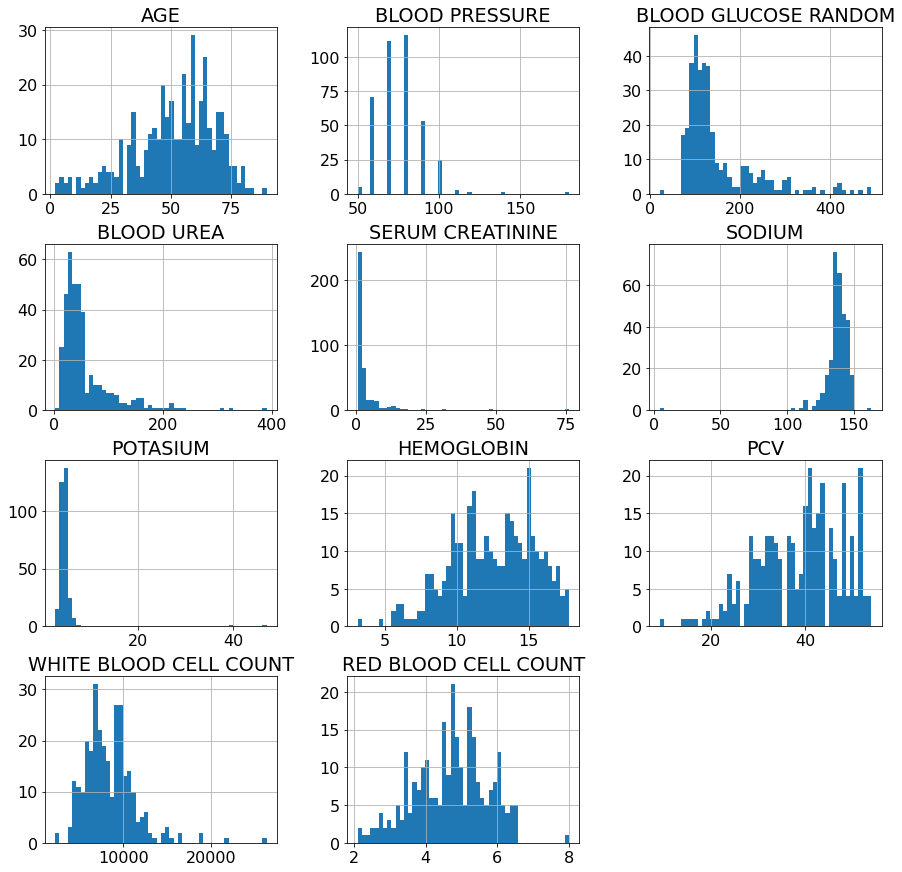

In [123]:
plt.rcParams['figure.figsize'] = (15.0,15.0)  
dataframe[NUM_VARS].hist(bins=50)
plt.show()

I see the numerical variables with high skewness and kurtosis. Before doing any transformation, I will impute the missing values and then I will apply a Yeo-Johnson transformation on these variables, in order to make them look the most normally distributed possible.

## 1.5: Missing data imputation

I noticed that there are many variables with missing values or "NaN". I will check first which variables present missing values.

In [124]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False)

check_missing_values(dataframe,cols=None,axis=0).head(15)

missing_num  missing_percent
RED BLOOD CELLS                 152            38.00
RED BLOOD CELL COUNT            131            32.75
WHITE BLOOD CELL COUNT          106            26.50
POTASIUM                         88            22.00
SODIUM                           87            21.75
PCV                              71            17.75
PUS CELL                         65            16.25
HEMOGLOBIN                       52            13.00
SUGAR                            49            12.25
SPECIFIC GRAVITY                 47            11.75
ALBUMINA                         46            11.50
BLOOD GLUCOSE RANDOM             44            11.00
BLOOD UREA                       19             4.75
SERUM CREATININE                 17             4.25
BLOOD PRESSURE                   12             3.00

I see that the maximum missing percent is less than 50%, therefore, it worth to keep these variables and fill the corresponding missing values by using some pre-fixed criterion. For example, for the categorical variables, to impute the missing values, I will use the mode of the corresponding column, and for the numerical variables, the median value of the column.

Special attention should be paid since we are dealing with a binary classification problem. Each class in LABEL is distributed differently, therefore, I will do this imputation procedure with each class separately.

* The way I did it is not the ideal one, but it is enough for the research environment*

In [125]:
for el in dataframe.columns:
    if dataframe[el].dtypes=="object":
        dataframe[el][dataframe['LABEL']==0]=dataframe[el][dataframe['LABEL']==0].fillna(dataframe[el][dataframe['LABEL']==0].mode()[0])
        dataframe[el][dataframe['LABEL']==1]=dataframe[el][dataframe['LABEL']==1].fillna(dataframe[el][dataframe['LABEL']==1].mode()[0])
    else:
        dataframe[el][dataframe['LABEL']==0]=dataframe[el][dataframe['LABEL']==0].fillna(dataframe[el][dataframe['LABEL']==0].median())
        dataframe[el][dataframe['LABEL']==1]=dataframe[el][dataframe['LABEL']==1].fillna(dataframe[el][dataframe['LABEL']==1].median())
        
dataframe

AGE  BLOOD PRESSURE SPECIFIC GRAVITY ALBUMINA   SUGAR  \
Patient                                                           
0        48.0            80.0             1.02   medium     low   
1         7.0            50.0             1.02     high     low   
2        62.0            80.0             1.01   medium  medium   
3        48.0            70.0            1.005     high     low   
4        51.0            80.0             1.01   medium     low   
...       ...             ...              ...      ...     ...   
395      55.0            80.0             1.02      low     low   
396      42.0            70.0            1.025      low     low   
397      12.0            80.0             1.02      low     low   
398      17.0            60.0            1.025      low     low   
399      58.0            80.0            1.025      low     low   

        RED BLOOD CELLS  PUS CELL PUS CELL CLUMPS    BACTERIA  \
Patient                                                         
0                normal    normal      notpresent  notpresent   
1                normal    normal      notpresent  notpresent   
2                normal    normal      notpresent  notpresent   
3                normal  abnormal         present  notpresent   
4                normal    normal      notpresent  notpresent   
...                 ...       ...             ...         ...   
395              normal    normal      notpresent  notpresent   
396              normal    normal      notpresent  notpresent   
397              normal    normal      notpresent  notpresent   
398              normal    normal      notpresent  notpresent   
399              normal    normal      notpresent  notpresent   

         BLOOD GLUCOSE RANDOM  ...   PCV  WHITE BLOOD CELL COUNT  \
Patient                        ...                                 
0                       121.0  ...  44.0                  7800.0   
1                       143.5  ...  38.0                  6000.0   
2                       423.0  ...  31.0                  7500.0   
3                       117.0  ...  32.0                  6700.0   
4                       106.0  ...  35.0                  7300.0   
...                       ...  ...   ...                     ...   
395                     140.0  ...  47.0                  6700.0   
396                      75.0  ...  54.0                  7800.0   
397                     100.0  ...  49.0                  6600.0   
398                     114.0  ...  51.0                  7200.0   
399                     131.0  ...  53.0                  6800.0   

         RED BLOOD CELL COUNT  HYPERTENSION  DIABETES MELLITUS  \
Patient                                                          
0                         5.2           yes                yes   
1                         3.9            no                 no   
2                         3.9            no                yes   
3                         3.9           yes                 no   
4                         4.6            no                 no   
...                       ...           ...                ...   
395                       4.9            no                 no   
396                       6.2            no                 no   
397                       5.4            no                 no   
398                       5.9            no                 no   
399                       6.1            no                 no   

         CORONARY ARTERY DISEASE  APPETITE  PEDAL EDEMA ANEMIA LABEL  
Patient                                                               
0                             no      good           no     no     1  
1                             no      good           no     no     1  
2                             no      poor           no    yes     1  
3                             no      poor          yes    yes     1  
4                             no      good           no     no     1  
...                          ...       ...         

In [126]:
check_missing_values(dataframe,cols=None,axis=0).head(15)

missing_num  missing_percent
AGE                                0              0.0
POTASIUM                           0              0.0
ANEMIA                             0              0.0
PEDAL EDEMA                        0              0.0
APPETITE                           0              0.0
CORONARY ARTERY DISEASE            0              0.0
DIABETES MELLITUS                  0              0.0
HYPERTENSION                       0              0.0
RED BLOOD CELL COUNT               0              0.0
WHITE BLOOD CELL COUNT             0              0.0
PCV                                0              0.0
HEMOGLOBIN                         0              0.0
SODIUM                             0              0.0
BLOOD PRESSURE                     0              0.0
SERUM CREATININE                   0              0.0

All missing values were imputed.

## 1.6 Yeo-Johnson transformation

In order to transform the categorical variables to make them look more normally distributed, I will apply a Yeo-Johnson transformation, which the reader could check in the Wikipedia link, for example:
https://en.wikipedia.org/wiki/Power_transform

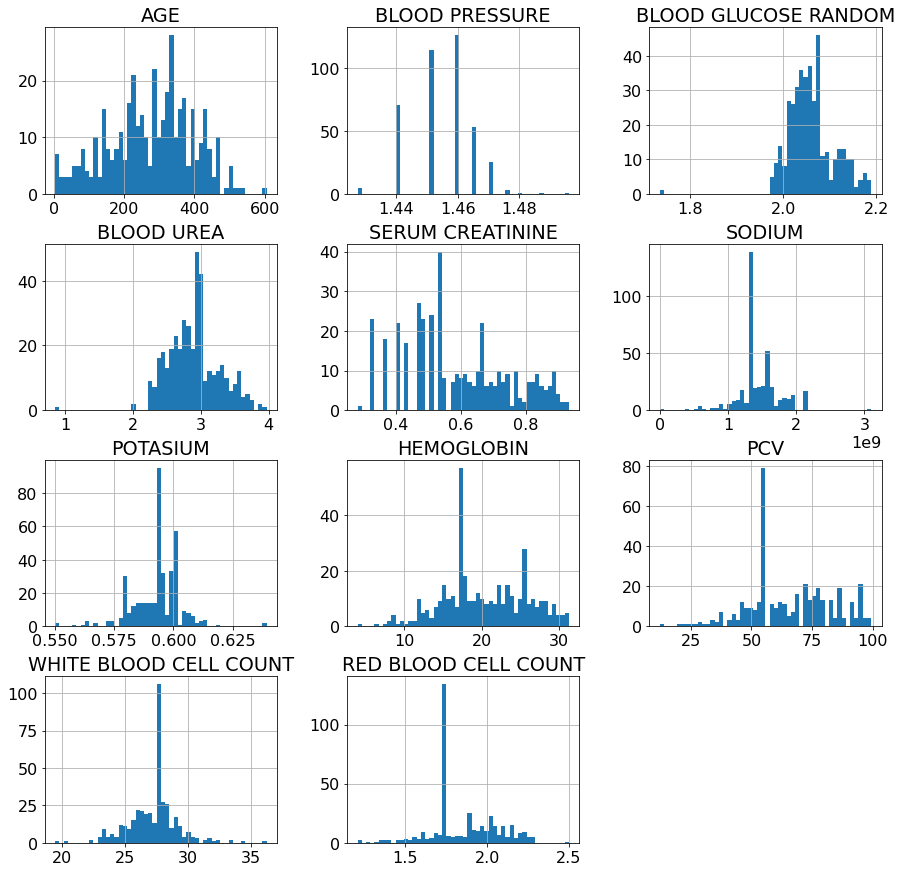

In [127]:
from scipy import stats

data = dataframe.copy()

lmbdas = []
for el in NUM_VARS:
    data[el], lmbda = stats.yeojohnson(data[el])
    lmbdas.append((el,lmbda))

data[NUM_VARS].hist(bins=50)
plt.show()

I will compare now the old skewness and kurtosis of the variables with the transformed ones. 

In [128]:
dataframe[NUM_VARS].skew()

AGE                       -0.694248
BLOOD PRESSURE             1.610314
BLOOD GLUCOSE RANDOM       2.155270
BLOOD UREA                 2.712550
SERUM CREATININE           7.672145
SODIUM                    -7.735728
POTASIUM                  13.131597
HEMOGLOBIN                -0.183333
PCV                       -0.148253
WHITE BLOOD CELL COUNT     1.771413
RED BLOOD CELL COUNT       0.429510
dtype: float64

In [129]:
data[NUM_VARS].skew()

AGE                      -0.230028
BLOOD PRESSURE           -0.018187
BLOOD GLUCOSE RANDOM     -0.153863
BLOOD UREA               -0.040695
SERUM CREATININE          0.267547
SODIUM                    0.111655
POTASIUM                 -0.362601
HEMOGLOBIN               -0.047802
PCV                      -0.033875
WHITE BLOOD CELL COUNT    0.047399
RED BLOOD CELL COUNT      0.000612
dtype: float64

In [130]:
dataframe[NUM_VARS].kurtosis()

AGE                         0.125460
BLOOD PRESSURE              8.907907
BLOOD GLUCOSE RANDOM        5.158895
BLOOD UREA                  9.969307
SERUM CREATININE           82.780351
SODIUM                    107.372016
POTASIUM                  183.380247
HEMOGLOBIN                 -0.402477
PCV                        -0.312771
WHITE BLOOD CELL COUNT      8.997559
RED BLOOD CELL COUNT       -0.029261
dtype: float64

In [131]:
data[NUM_VARS].kurtosis()

AGE                      -0.522086
BLOOD PRESSURE            0.399464
BLOOD GLUCOSE RANDOM      4.282490
BLOOD UREA                1.643205
SERUM CREATININE         -0.882043
SODIUM                    3.971387
POTASIUM                  3.690933
HEMOGLOBIN               -0.586841
PCV                      -0.492158
WHITE BLOOD CELL COUNT    2.450063
RED BLOOD CELL COUNT      0.094219
dtype: float64

I see on average the Skewness and Kurtosis were reduced; thus making the numerical variables look more normally distributed. I will substitute the transformed variables into our dataframe, to continue with the project.

In [132]:
dataframe[NUM_VARS] = data[NUM_VARS]
dataframe

AGE  BLOOD PRESSURE SPECIFIC GRAVITY ALBUMINA   SUGAR  \
Patient                                                                 
0        237.155868        1.459190             1.02   medium     low   
1         14.685435        1.427527             1.02     high     low   
2        347.104321        1.459190             1.01   medium  medium   
3        237.155868        1.451112            1.005     high     low   
4        259.515045        1.459190             1.01   medium     low   
...             ...             ...              ...      ...     ...   
395      290.367564        1.459190             1.02      low     low   
396      194.530782        1.451112            1.025      low     low   
397       31.317284        1.459190             1.02      low     low   
398       51.647043        1.440913            1.025      low     low   
399      314.263991        1.459190            1.025      low     low   

        RED BLOOD CELLS  PUS CELL PUS CELL CLUMPS    BACTERIA  \
Patient                                                         
0                normal    normal      notpresent  notpresent   
1                normal    normal      notpresent  notpresent   
2                normal    normal      notpresent  notpresent   
3                normal  abnormal         present  notpresent   
4                normal    normal      notpresent  notpresent   
...                 ...       ...             ...         ...   
395              normal    normal      notpresent  notpresent   
396              normal    normal      notpresent  notpresent   
397              normal    normal      notpresent  notpresent   
398              normal    normal      notpresent  notpresent   
399              normal    normal      notpresent  notpresent   

         BLOOD GLUCOSE RANDOM  ...        PCV  WHITE BLOOD CELL COUNT  \
Patient                        ...                                      
0                    2.051550  ...  77.943458               26.878854   
1                    2.072875  ...  65.573629               25.167119   
2                    2.177913  ...  51.606059               26.616862   
3                    2.047167  ...  53.568093               25.875449   
4                    2.033937  ...  59.522387               26.437578   
...                       ...  ...        ...                     ...   
395                  2.069879  ...  84.252127               25.875449   
396                  1.983125  ...  99.264913               26.878854   
397                  2.025874  ...  88.500834               25.777940   
398                  2.043738  ...  92.782580               26.346482   
399                  2.061666  ...  97.096335               25.971819   

         RED BLOOD CELL COUNT  HYPERTENSION  DIABETES MELLITUS  \
Patient                                                          
0                    2.029838           yes                yes   
1                    1.743543            no                 no   
2                    1.743543            no                yes   
3                    1.743543           yes                 no   
4                    1.905054            no                 no   
...                       ...           ...                ...   
395                  1.968851            no                 no   
396                  2.215829            no                 no   
397                  2.069061            no                 no   
398                  2.162567            no                 no   
399                  2.198297            no                 no   

         CORONARY ARTERY DISEASE  APPETITE  PEDAL EDEMA ANEMIA LABEL  
Patient                                                               
0                             no      good           no     no     1  
1                             no      good           no     no     1  
2                             no      poor           no    yes     1  
3                             no      poor          yes 

In [133]:
del data

## 1.7 Categorical variables
I will plot the distribution of the categorical variables and check their influence on the target variable.

In [134]:
def Data_Analytics(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="sum", data=df_cate,color="b")
    if colname == 'Centre':
        plt.xticks(size=18,rotation=90)
    else:
        plt.xticks(size=18,rotation=0)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

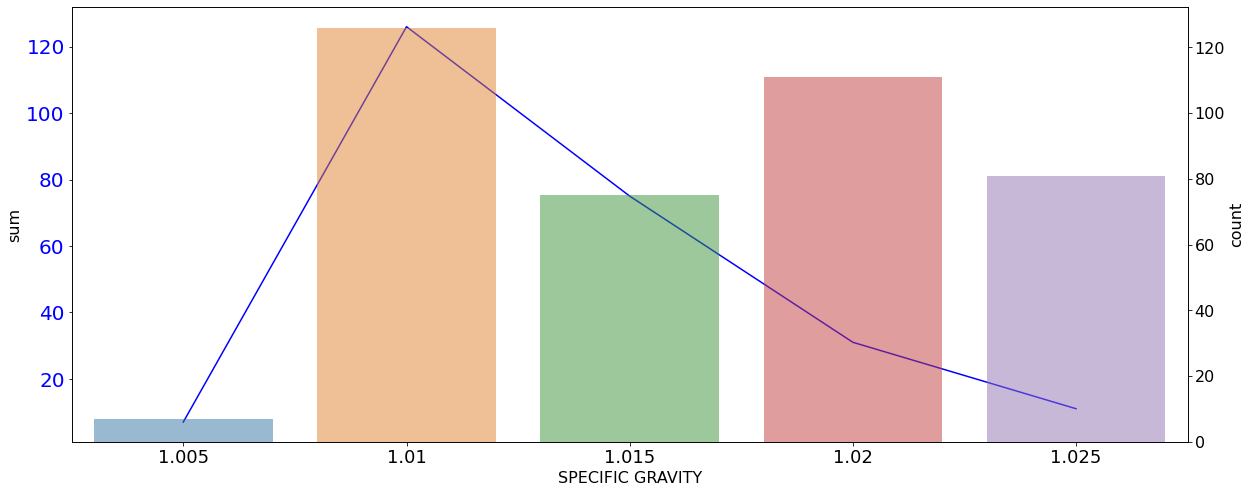

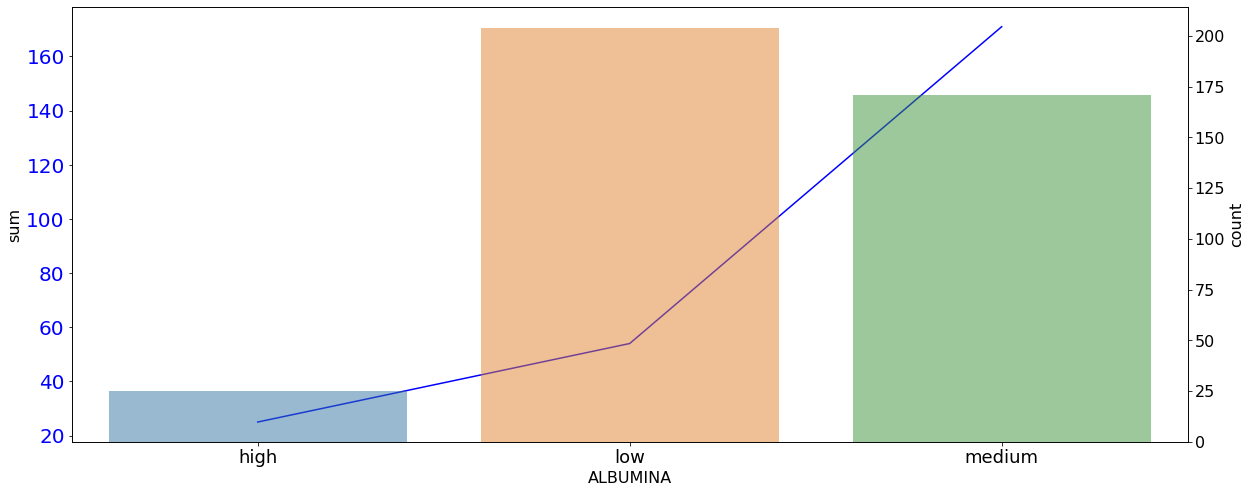

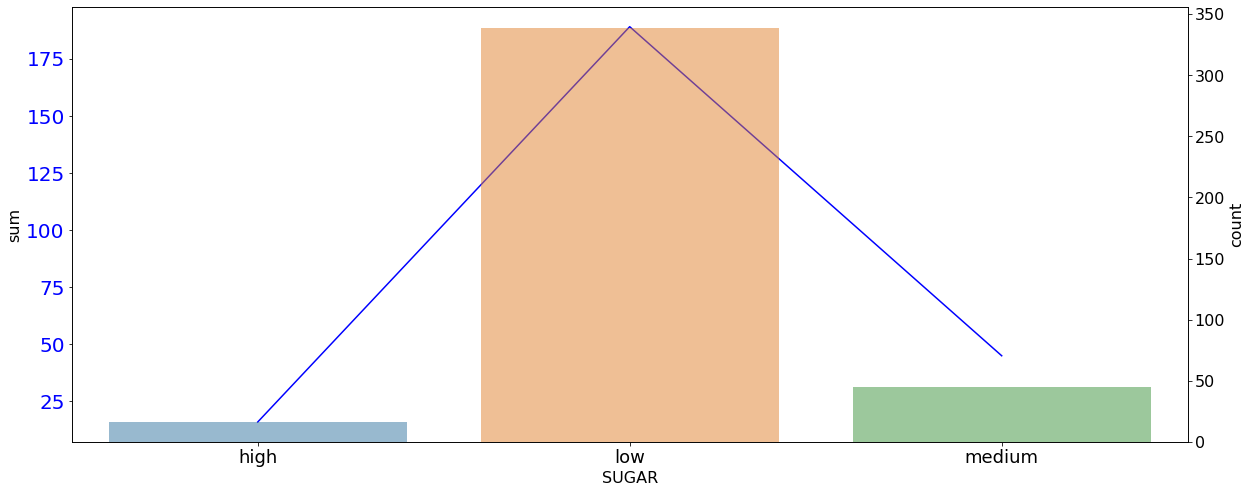

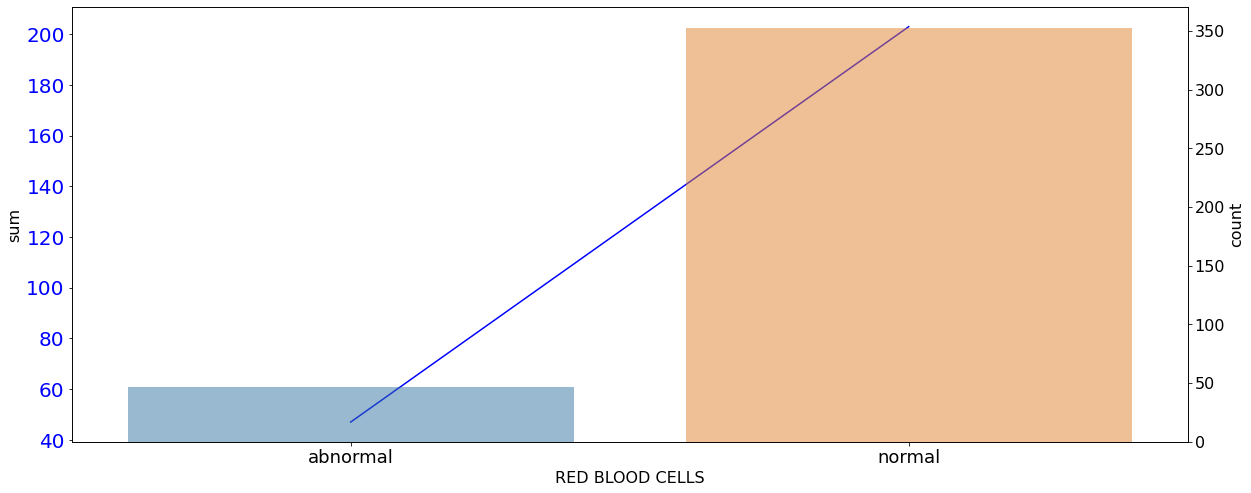

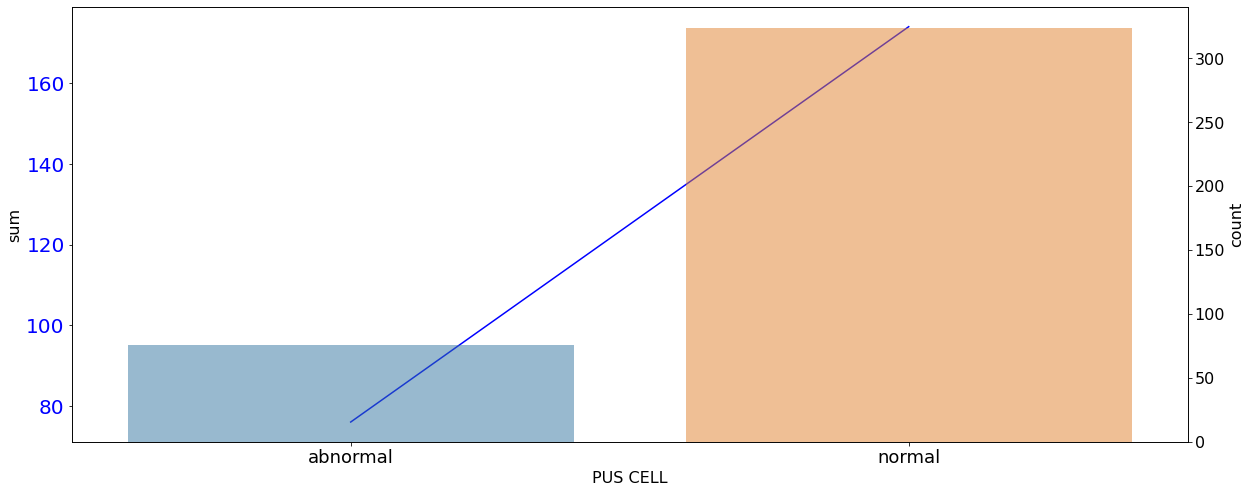

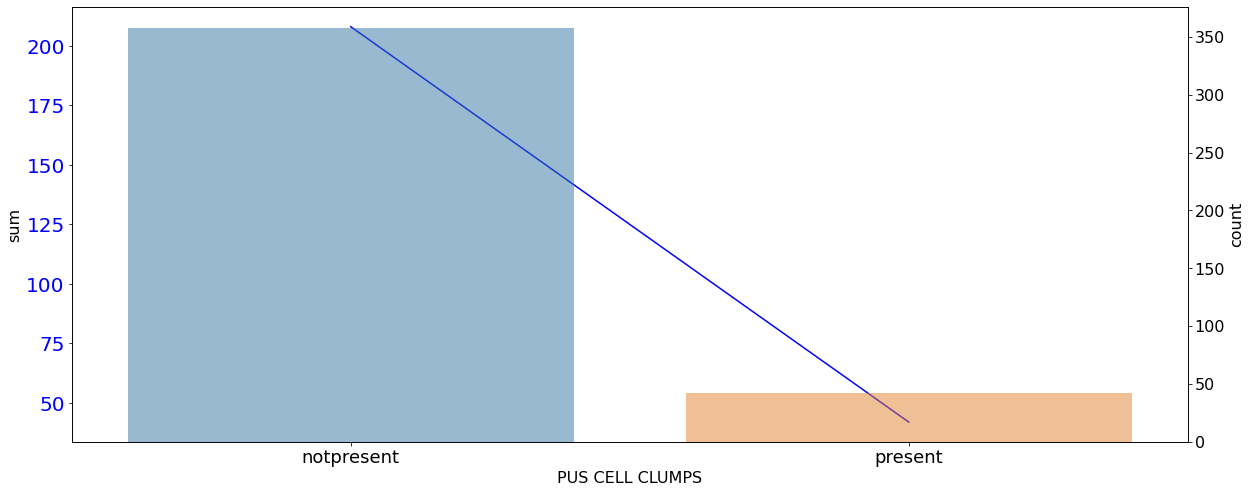

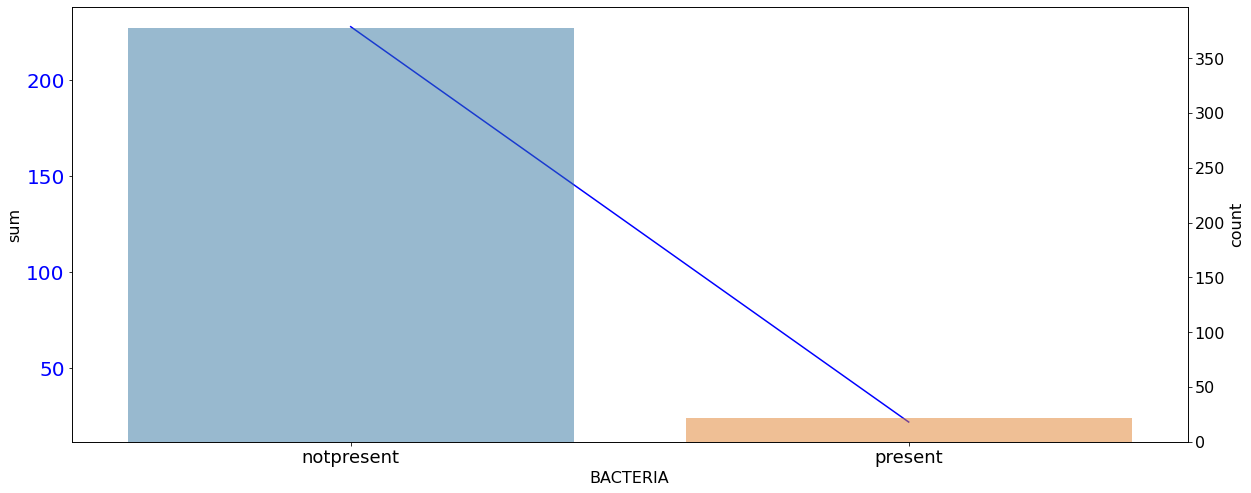

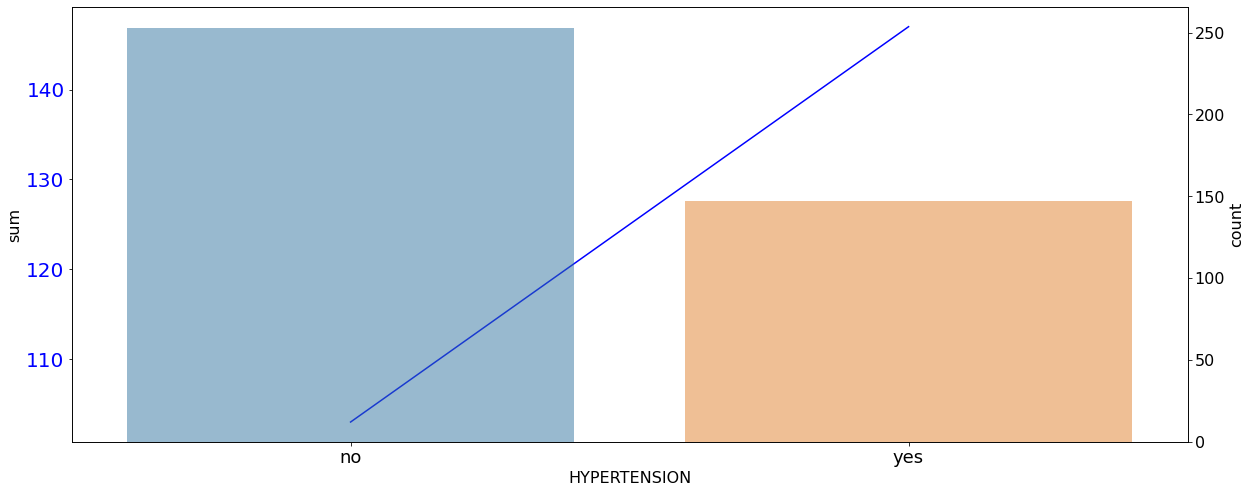

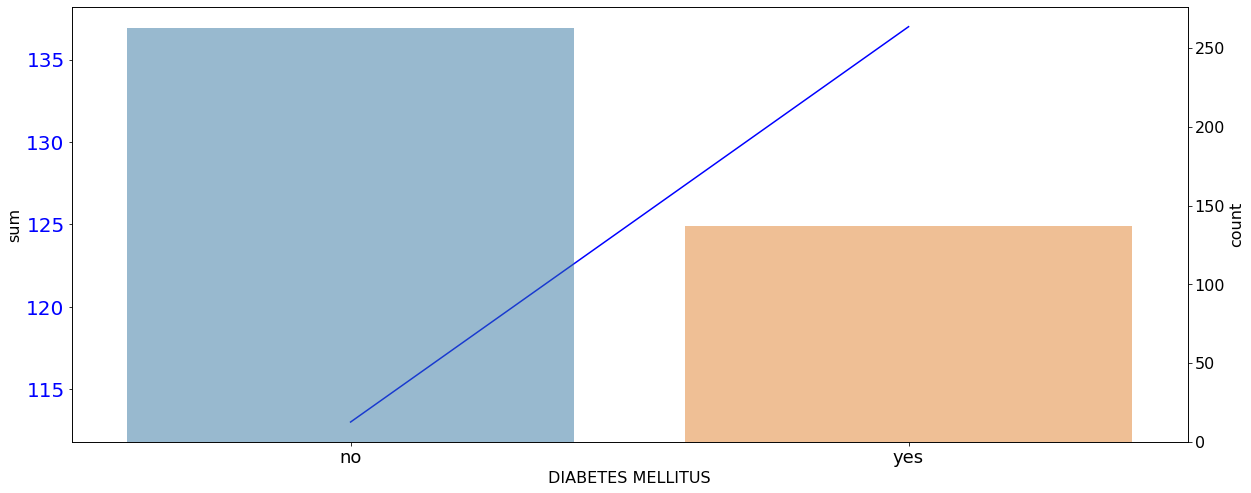

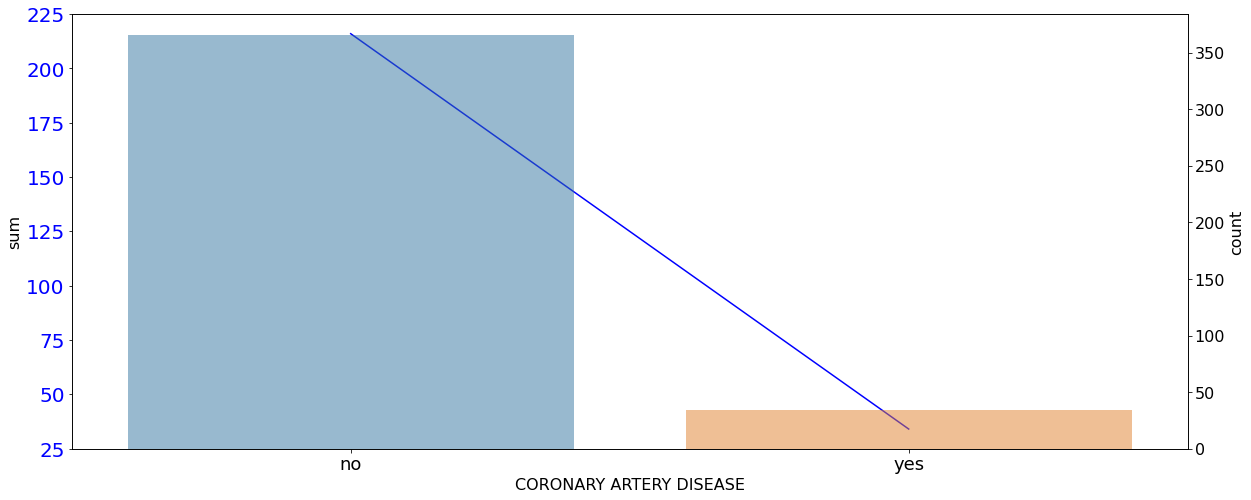

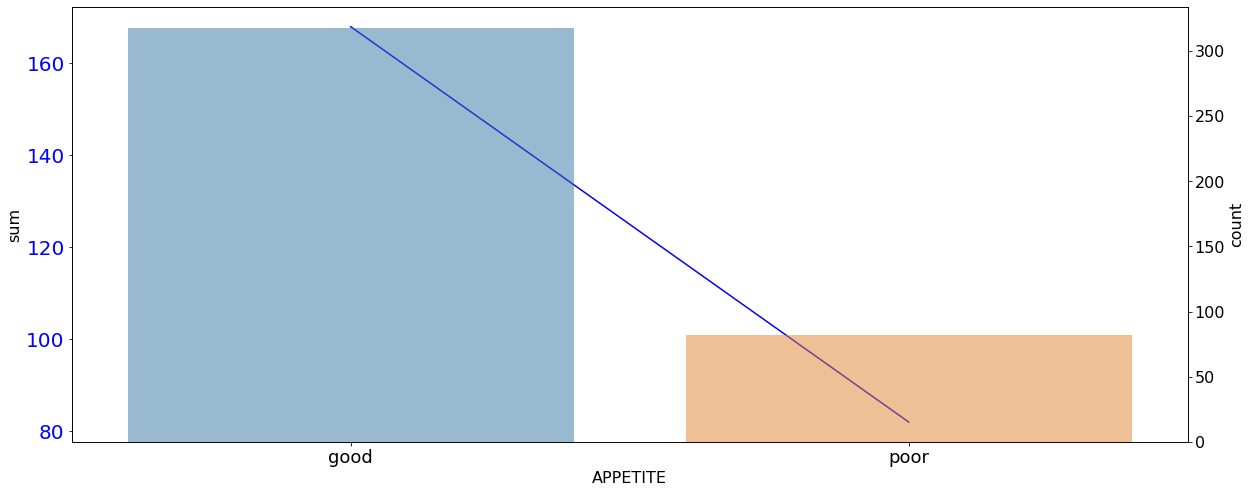

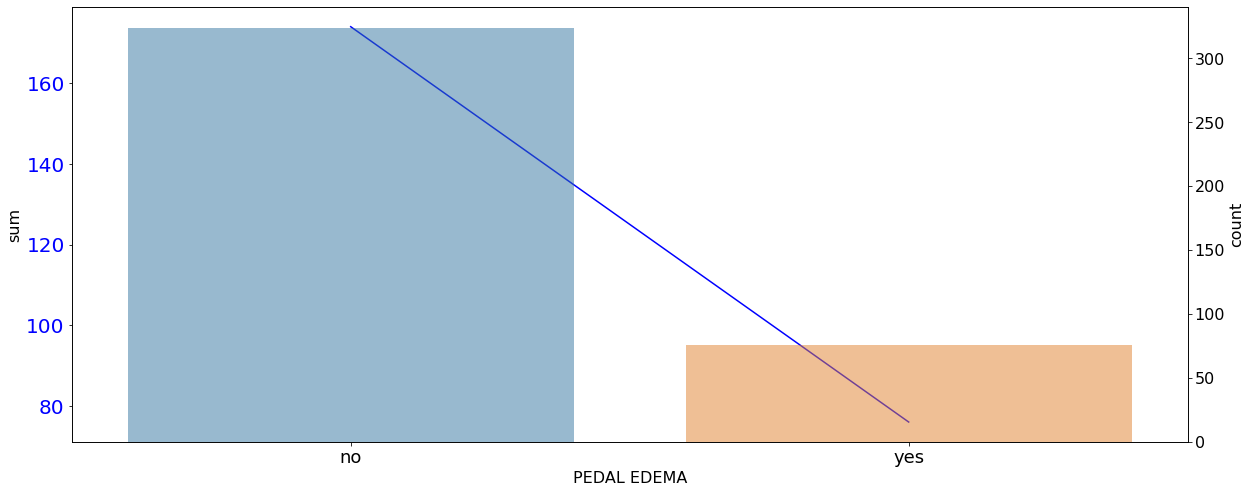

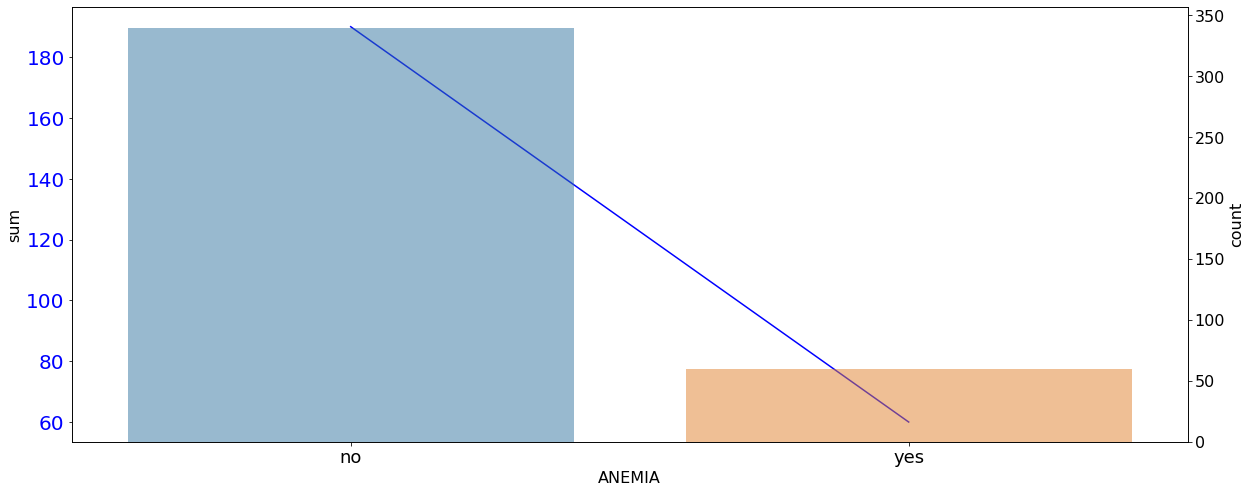

In [135]:
for el in CAT_VARS:
    Data_Analytics(dataframe,el,TARGET)

In the previous graphics are shown the distributions of the categorical variables (bar plots) and how many patients in total (blue line) present a Chronic Kidney Disease by each category.

## 1.8: Balance

I will plot the distribution of the target variable to check whether there is an imbalance or not.

1      0
LABEL  0.625  0.375

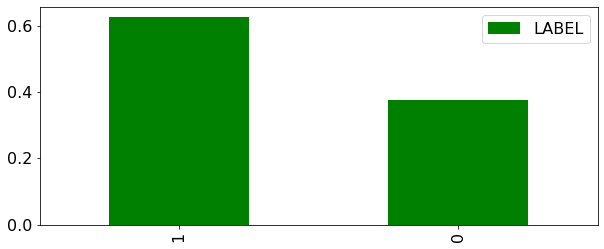

In [138]:
diabetes = dataframe[TARGET].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
diabetes.plot.bar(color='g')
diabetes.T

One can see that 62.5% of the patients in this database present Chronic Kidney Decease, while 37.5% do not. The dataset is not balanced. Therefore, to have reliable predictions, we should come up with a balance strategy in order not to bias the final predictions.

## 1.9 Encoding of Categorical Variables
Before producing any Machine Learning model, all categorical variables should be transformed to numerical. To this end, I will encode them using the dummy encoder from Pandas.

In [139]:
# Encodes the categorical
df_to_encode = dataframe[CAT_VARS]
df_encoded = pd.get_dummies(df_to_encode,drop_first=False)
#Formats the names of the variables
df_encoded.columns = [el.replace('_','[')+']' for el in df_encoded.columns]
dataframe = pd.concat([dataframe,df_encoded],axis=1).drop(CAT_VARS,axis=1)
del df_to_encode, df_encoded
# Returns the dataframe with the one-hot-encoded categorical variables
dataframe

AGE  BLOOD PRESSURE  BLOOD GLUCOSE RANDOM  BLOOD UREA  \
Patient                                                                 
0        237.155868        1.459190              2.051550    2.799438   
1         14.685435        1.427527              2.072875    2.388314   
2        347.104321        1.459190              2.177913    3.015299   
3        237.155868        1.451112              2.047167    3.045197   
4        259.515045        1.459190              2.033937    2.610109   
...             ...             ...                   ...         ...   
395      290.367564        1.459190              2.069879    2.972328   
396      194.530782        1.451112              1.983125    2.713292   
397       31.317284        1.459190              2.025874    2.610109   
398       51.647043        1.440913              2.043738    2.983431   
399      314.263991        1.459190              2.061666    2.388314   

         SERUM CREATININE        SODIUM  POTASIUM  HEMOGLOBIN        PCV  \
Patient                                                                    
0                0.533959  1.358846e+09  0.593370   26.249905  77.943458   
1                0.437173  1.358846e+09  0.593370   18.017010  65.573629   
2                0.626020  1.358846e+09  0.593370   14.797849  51.606059   
3                0.763456  5.395999e+08  0.550120   17.824234  53.568093   
4                0.569923  1.358846e+09  0.593370   18.597797  59.522387   
...                   ...           ...       ...         ...        ...   
395              0.329433  2.122594e+09  0.600688   26.875660  84.252127   
396              0.533959  1.601513e+09  0.579556   28.558664  99.264913   
397              0.369978  1.404909e+09  0.594735   27.084902  88.500834   
398              0.490556  1.313971e+09  0.600688   23.777223  92.782580   
399              0.513323  1.601513e+09  0.579556   27.084902  97.096335   

         WHITE BLOOD CELL COUNT  ...  DIABETES MELLITUS[no]  \
Patient                          ...                          
0                     26.878854  ...                      0   
1                     25.167119  ...                      1   
2                     26.616862  ...                      0   
3                     25.875449  ...                      1   
4                     26.437578  ...                      1   
...                         ...  ...                    ...   
395                   25.875449  ...                      1   
396                   26.878854  ...                      1   
397                   25.777940  ...                      1   
398                   26.346482  ...                      1   
399                   25.971819  ...                      1   

         DIABETES MELLITUS[yes]  CORONARY ARTERY DISEASE[no]  \
Patient                                                        
0                             1                            1   
1                             0                            1   
2                             1                            1   
3                             0                            1   
4                             0                            1   
...                         ...                          ...   
395                           0                            1   
396                           0                            1   
397                           0                            1   
398                           0                            1   
399                           0                            1   

         CORONARY ARTERY DISEASE[yes]  APPETITE[good]  APPETITE[poor]  \
Patient                                                                 
0                                   0               1               0   
1                                   0               1               0   
2                                   0               0               1   
3                                   0               0      

## 1.10 Scaling of the numerical variables

I will normalize and scale the numerical variables using the Standard Scaler. 
This transformation arranges the numerical variables in a standard normal distribution, thus complementing the Yeo-Johnson transformation.

In [141]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
dataframe[NUM_VARS] = sc_X.fit_transform(dataframe[NUM_VARS])
dataframe

AGE  BLOOD PRESSURE  BLOOD GLUCOSE RANDOM  BLOOD UREA  \
Patient                                                               
0       -0.319345        0.401799             -0.173359   -0.264606   
1       -2.165619       -2.797700              0.260235   -1.358026   
2        0.593113        0.401799              2.396014    0.309497   
3       -0.319345       -0.414493             -0.262485    0.389014   
4       -0.133787        0.401799             -0.531499   -0.768142   
...           ...             ...                   ...         ...   
395      0.122257        0.401799              0.199333    0.195211   
396     -0.673089       -0.414493             -1.564669   -0.493718   
397     -2.027591        0.401799             -0.695453   -0.768142   
398     -1.858876       -1.445078             -0.332203    0.224742   
399      0.320573        0.401799              0.032328   -1.358026   

         SERUM CREATININE    SODIUM  POTASIUM  HEMOGLOBIN       PCV  \
Patient                                                               
0               -0.351620 -0.313590  0.032341    1.099212  0.705129   
1               -0.955603 -0.313590  0.032341   -0.414314 -0.018199   
2                0.222874 -0.313590  0.032341   -1.006121 -0.834955   
3                1.080531 -3.029871 -4.296251   -0.449754 -0.720224   
4               -0.127190 -0.313590  0.032341   -0.307543 -0.372046   
...                   ...       ...       ...         ...       ...   
395             -1.627944  2.218685  0.764737    1.214250  1.074029   
396             -0.351620  0.490995 -1.350216    1.523651  1.951904   
397             -1.374927 -0.160861  0.168969    1.252717  1.322473   
398             -0.622475 -0.462374  0.764737    0.644637  1.572849   
399             -0.480398  0.490995 -1.350216    1.252717  1.825096   

         WHITE BLOOD CELL COUNT  ...  DIABETES MELLITUS[no]  \
Patient                          ...                          
0                     -0.180431  ...                      0   
1                     -1.058385  ...                      1   
2                     -0.314808  ...                      0   
3                     -0.695080  ...                      1   
4                     -0.406763  ...                      1   
...                         ...  ...                    ...   
395                   -0.695080  ...                      1   
396                   -0.180431  ...                      1   
397                   -0.745093  ...                      1   
398                   -0.453486  ...                      1   
399                   -0.645652  ...                      1   

         DIABETES MELLITUS[yes]  CORONARY ARTERY DISEASE[no]  \
Patient                                                        
0                             1                            1   
1                             0                            1   
2                             1                            1   
3                             0                            1   
4                             0                            1   
...                         ...                          ...   
395                           0                            1   
396                           0                            1   
397                           0                            1   
398                           0                            1   
399                           0                            1   

         CORONARY ARTERY DISEASE[yes]  APPETITE[good]  APPETITE[poor]  \
Patient                                                                 
0                                   0               1               0   
1                                   0               1               0   
2                                   0               0               1   
3                                   0               0               1   
4                                   0               1               0   
..

## 1.11: Principal Component Analysis

Before producing any model, I will perform a Principal Component Analysis to visualize the data into a two-dimensional frame in order to check whether it's well clustered or not. The following code does this job in reducing the dimensionality of the dataset and plot it into its different components.

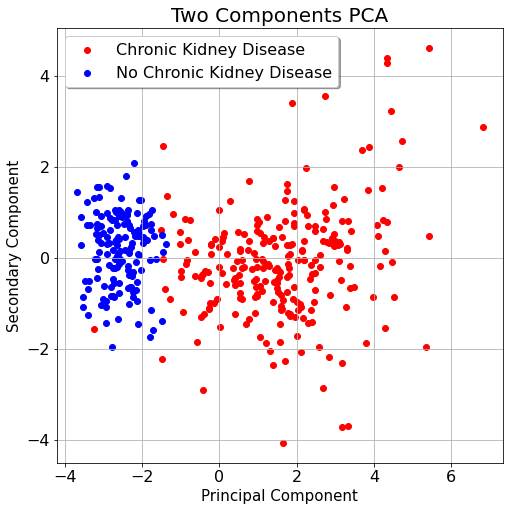

In [142]:
from sklearn.decomposition import PCA

x = dataframe.loc[:, dataframe.drop(TARGET,axis=1).columns].values
y = dataframe.loc[:,TARGET].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                                  'principal component 2'])
finalDf = pd.concat([principalDf, dataframe[[TARGET]]], axis = 1)
finalDfckd = finalDf[finalDf[TARGET]==1].drop(TARGET,axis=1)
finalDfnotckd = finalDf[finalDf[TARGET]==0].drop(TARGET,axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component', fontsize = 15)
ax.set_ylabel('Secondary Component', fontsize = 15)
ax.set_title('Two Components PCA', fontsize = 20)

ax.scatter(finalDfckd["principal component 1"],finalDfckd["principal component 2"],c='r')
ax.scatter(finalDfnotckd["principal component 1"],finalDfnotckd["principal component 2"],c='b')

targets = ['Chronic Kidney Disease', 'No Chronic Kidney Disease']
legend = ax.legend(targets, loc='best', shadow=True)
legend.get_frame().set_facecolor('white')
ax.grid()

The data seems well clustered as the patients with no Chronic Kidney Disease are separared to the left from those with Chronic Kidney Disease. The class of patients with Chronic Kidney Disease shows some large dispersions though.

# 2: Machine Learning model

In this section I will use a Machine Learning classifier to complete the task of predicting patients with Chronic Kidney Diseases. The model that I will use is the CatBoost, which is very flexible and powerful, and the data imbalance is handled within the model. I will optimize the hyperparameters using the Basin-Hopping optimization algorithm, by minimizing the sum of all the non-diagonal entries squared. Once obtained the optimal parameters, I will produce the model and compute some metrics to observe its performance.

Before doing all this, I will split the data into training and testing subsamples, with the ratio test/train=0.3. I will train the model with the training subsample and then score it with the test one.

The code below resumes all these steps.

In [145]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from scipy.optimize import basinhopping
from sklearn.metrics import accuracy_score, confusion_matrix

# Train-Test subsamples
training, testing = train_test_split(dataframe,test_size=0.3,stratify=dataframe[TARGET])


# Machine Learning classifier
# ===========================
def ml_classifier(df, target):
    # Copies the dataframe
    df = df.copy()
    
    # Trains the model
    def train_model(X_train, y_train, params):
        n_estimators, learning_rate, random_seed = params
        # Defines the model
        model = CatBoostClassifier(learning_rate=learning_rate,
                                   random_seed=int(random_seed),
                                   verbose=False,
                                   has_time=False,
                                   allow_const_label=False,
                                   n_estimators=int(n_estimators),
                                   auto_class_weights = 'Balanced')
        model = model.fit(X_train,y_train)
        return model

    # Defines the metric to optimize the hyper parameters of the model
    def metric(params):
        # Splits into train and internal validation subsamples
        X_train, X_valid, y_train, y_valid = train_test_split(df.drop(str(target),1),df[str(target)],test_size=0.2)
        # Loads the model
        model = train_model(X_train, y_train, params)
        cf_matrix = confusion_matrix(y_valid,model.predict(X_valid))
        cf_matrix = np.sum(np.array(cf_matrix)**2)-np.trace(np.array(cf_matrix)**2)
        # Returns the sum of squares of the non-diagonal elements
        return cf_matrix

    # This is the optimizer of the model
    # n_estimators, learning_rate, random_state, 
    boundary = [(1, 200), (1e-6, 1.0), (0, 100)]
    # Initial point, not needed for the differential_evolution minimizer
    x0 = [np.mean(el) for el in boundary]
    
    # Minimizer using the Basin-Hoping algorithm
    # Uses the method L-BFGS-B because the problem is smooth and bounded
    minimizer_kwargs = dict(method="L-BFGS-B", bounds=boundary)
    opt = basinhopping(metric, x0, minimizer_kwargs=minimizer_kwargs)
    
    # Prints the validation metric and the optimal parameters
    print("The validation metric is: ", opt.fun)
    print("  ")
    print("The optimized hyper-parameters are: ")
    print("n_estimators is: ", int(opt.x[0]))
    print("learning_rate is: ", opt.x[1])
    print("random_state is: ", int(opt.x[2]))
    
    # Defines the optimized model
    model = train_model(df.drop(str(target),1), df[str(target)],opt.x)
    # Prints the accuracy of the model
    print("The accuracy of the model is: ", accuracy_score(df[str(target)],model.predict(df.drop(str(target),1))))
    # Returns the optimized and fitted model
    print('Finished training.')
    return model

Now I call the model to be optimized!

In [146]:
model = ml_classifier(training, TARGET)

The validation metric is:  0
  
The optimized hyper-parameters are: 
n_estimators is:  100
learning_rate is:  0.06370844467535308
random_state is:  49
The accuracy of the model is:  1.0
Finished training.


The optimization did a great job as it says that the sum of the squares of the non-diagonal entries of the Confusion Matrix are zero, which means no False Positives and no False Negatives and by concequence, the Accuracy of the model is 1, and so the ROC-AUC. 

I will show the classification report on the training subsample and plot a heatmap of the Confusion Matrix.

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       105
           1     1.0000    1.0000    1.0000       175

    accuracy                         1.0000       280
   macro avg     1.0000    1.0000    1.0000       280
weighted avg     1.0000    1.0000    1.0000       280



Text(0.5, 46.0, 'Actual')

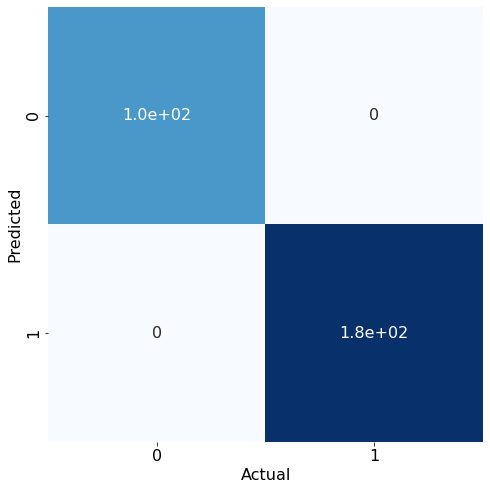

In [152]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(training[TARGET],
                            model.predict(training.drop(TARGET,axis=1)),digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(training[TARGET],
                             model.predict(training.drop(TARGET,axis=1))),
                             annot=True, square=True, cmap = 'Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')

#### ROC-AUC

The predictions on the training subsample are exact and the Confusion Matrix is perfectly diagonal, which was the scope of the optimizer. Next, I will plot the ROC curve to observe the AUC.

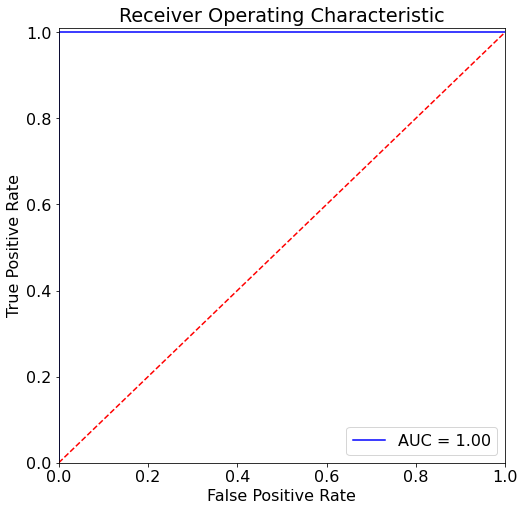

In [156]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(training[TARGET], model.predict_proba(training.drop(TARGET,axis=1))[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC is 1 which shows a perfect classification. Now I will check for the variable importance, to see which are the most important factors on developing a Chronic Kidney Disease according to the model.

For the model explainability, I will use SHAP.

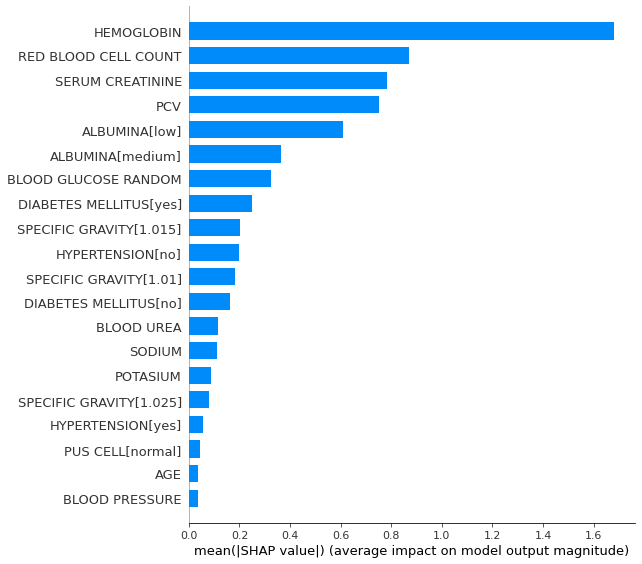

In [185]:
import shap
from catboost import Pool

explainer = shap.TreeExplainer(model)

X_train = training.drop(TARGET,axis=1)
y_train = training[TARGET]

shap_values = explainer.shap_values(Pool(X_train,y_train))
shap.summary_plot(shap_values, X_train, plot_type="bar")

The most largest impacts are on the the HEMOGLOBIN concentration, RED BLOOD CELL COUNT, SERUM CREATININE, PCV and MEDIUM ALBUMINA concentration.

The smallest impacts are in BLOOD PRESSURE, AGE and NORMAL PUS CELL. There are other variables they don't appear on the bar plot. They produce negative or no impact on the predictions.

Next, I will summarize the effects of all the variables.

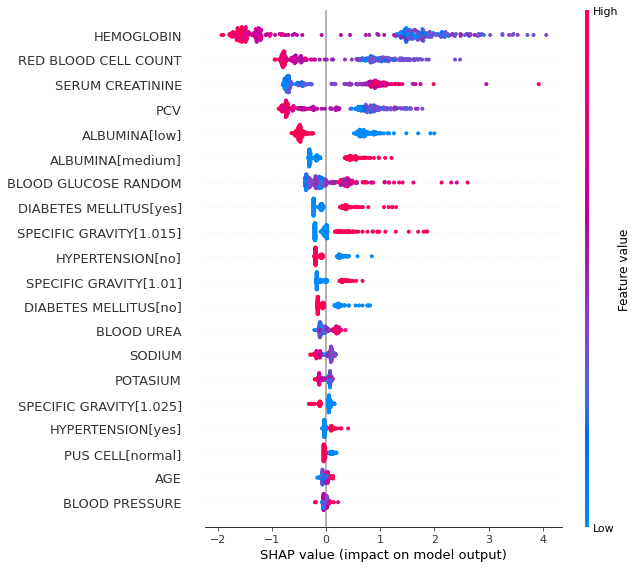

In [186]:
shap.summary_plot(shap_values, X_train)

So, whats going on here?

First, a quick recap as to what's going on in this plot.

The plot shows a cumulation of many dots.
The dots have three characteristics:
1. The vertical location of the dots show what variable they are depicting
2. Color shows whether that variable value was high or low for that row of the dataset
3. Horizontal location shows whether the effect of that value caused a higher or lower prediction.

So, for example, the HEMOGLOBIN concentration, low concentration (bluish points) has a positive impact on detecting whether a patient has a Chronic Kidney Disease. The same with RED BLOOD CELL COUNT.

Now that the model is produced and explained, I will score it using unseen data.

## 2.1 Scoring the model

In this subsection I will score the model using the testing subsample, which is unseen by the model.
I will print the classification report and plot a heatmap of the Confusion Matrix to observe the False Negative and False positive rates.

              precision    recall  f1-score   support

           0     0.9783    1.0000    0.9890        45
           1     1.0000    0.9867    0.9933        75

    accuracy                         0.9917       120
   macro avg     0.9891    0.9933    0.9911       120
weighted avg     0.9918    0.9917    0.9917       120



Text(0.5, 46.0, 'Actual')

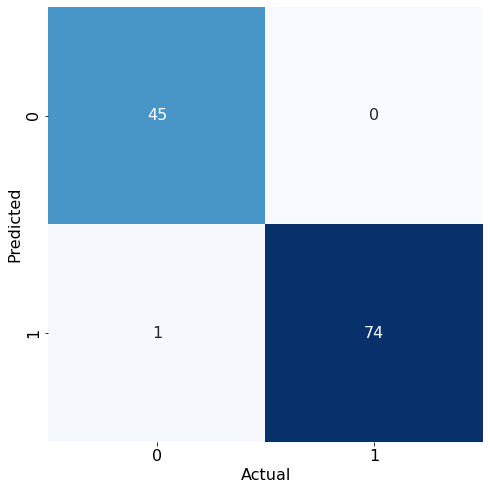

In [187]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(testing[TARGET],
                            model.predict(testing.drop(TARGET,axis=1)),digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(testing[TARGET],
                             model.predict(testing.drop(TARGET,axis=1))),
                             annot=True, square=True, cmap = 'Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')

The accuracy of the model is of 99.18%, which is excellent and shows that the model is not overfitted. In consequence, there is only one False Positive in a subpopulation of 120 patients, which is great.

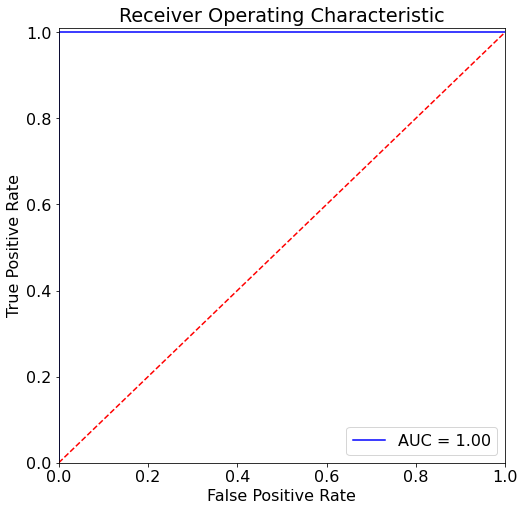

In [189]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(testing[TARGET], model.predict_proba(testing.drop(TARGET,axis=1))[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC-AUC is perfect as well, showing an AUC of 1.

# Conclusions!

The goal of this project is to build a predictive model using Machine Learning techniques to classify patients with Chronic Kidney Disease from the data collected, which include patients characteristics and blood test results.

A statistical study of each variable is performed in order to understand the distributions of the variables and to apply some transformations for a better performance and low latency of the models. Data imputation, Yeo-Johnson transformations, One-Hot-Encoding and Standard Scaling where the main transformations done.

A CatBoost model was optimized to make the predictions. The trained model shows a great performance on the training subsample, predicting at 100%. Several metrics, such as the Accuracy, Confusion Matrix, Precision, Recall, F1-Score and the ROC-AUC were evaluated, to assure the quality.

The explainability of the model was achieved as well, showing which variables have a significant impact on the predictions. These variables are: HEMOGLOBIN concentration, RED BLOOD CELL COUNT, SERUM CREATININE, PCV and MEDIUM ALBUMINA concentration.


To validate the model, I used a testing subsample, not seen during the training stage, to evaluate different metrics. There is only one False Positive prediction out of a subpopulation of 120 patients, which means an error of 0.833%, which is very low, therefore, this model can be perfectly validated and saved for the production environment if needed.